In [1]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import math


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)
X_train[0].shape


(28, 28)

In [4]:
X_train[0] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

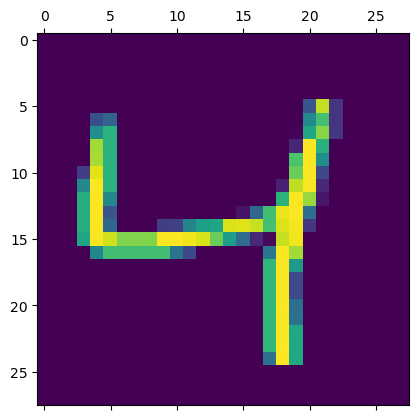

In [5]:
plt.matshow(X_train[2])

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
X_train_flattened = X_train.reshape(len(X_train), 28*28) #data is now flatenned contain 28 by 28 grid.
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [9]:
X_test_flattened.shape

(10000, 784)

In [10]:
X_train_flattened[0] #Now it is converted into 1D array so these values will be provided to neural network.

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
# #we stored the data in a variable model.
# #and the before input_layer is the output neurons having 10 output neurons which contain sigmoid activation function 
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28,28)),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dense(10, activation='sigmoid'),
#     # keras.layers.Dense(128, input_shape=(784,), activation='relu'),    #it means that each neuron is connected with each activation function. ex 10 neurons on input side will go for 10 activation functions
#     # keras.layers.Dense(10, activation='softmax') 
# ]) #it will stack up all the 1D array values on input layer side.
# model.compile(
#     optimizer='adam', #adam function is like gradient descent where we change theta0 and theta1 values using batch gradient descent, stochastic GD.
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )
# #we change the activation function to relu and softmax then the accuracy increases.
# model.fit(X_train_flattened, y_train, epochs=5) #we will suplly training data here.
# #As we know after compiling the accuracy is very low . so we scale our data from 0-1.
# #after Scaling accuracy is evolved
# test_loss, test_acc = model.evaluate(X_test_flattened, y_test)
# print(f'\nTest accuracy: {test_acc:.2f}')

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8111 - loss: 0.7219
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9136 - loss: 0.3113
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9191 - loss: 0.2880
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9245 - loss: 0.2750
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9261 - loss: 0.2679


In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9154 - loss: 0.3020


[0.2655036747455597, 0.9261000156402588]

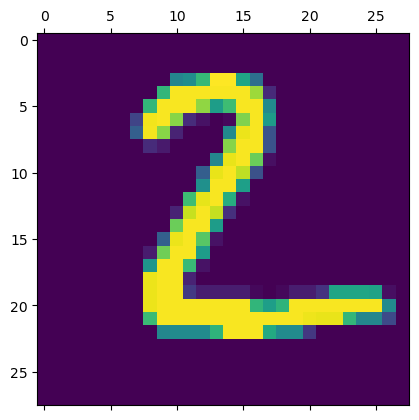

In [14]:
plt.matshow(X_test[1])

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([4.9443385e-01, 7.3824711e-03, 9.9955660e-01, 2.8102204e-01,
       1.0103482e-09, 8.3871579e-01, 8.1578577e-01, 8.3392456e-13,
       1.6846289e-01, 2.2117927e-09], dtype=float32)

**np.argmax finds a maximum element  from an array and returns the index of it**

In [16]:
np.argmax(y_predicted[1]) #now it's showing the correct output 

2

<h3 style='color:purple'>Using hidden layer</h3>

In [17]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8751 - loss: 0.4416
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9600 - loss: 0.1398
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9733 - loss: 0.0908
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9802 - loss: 0.0661
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9853 - loss: 0.0504


In [18]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9687 - loss: 0.1011


[0.08688484132289886, 0.9729999899864197]

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD', #this will give changed in results. Here shown below in the data
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7052 - loss: 1.0914
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9019 - loss: 0.3552
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9147 - loss: 0.2995
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9237 - loss: 0.2675
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9320 - loss: 0.2437


**TensorBoard For VISUALIZATION**

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
#SGD = Stochastic Gradient Descent
model.compile(optimizer='SGD', #this will give changed in results. Here shown below in the data
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7276 - loss: 1.0586
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9004 - loss: 0.3557
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9160 - loss: 0.2958
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9268 - loss: 0.2637
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9339 - loss: 0.2407


In [22]:
#ACtivation FUNCTION

def sigmoid(x):
    return 1 / (1+math.exp(-x))

In [23]:
sigmoid(0.21)

0.5523079095743253

In [24]:

def tanh(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [25]:
tanh(0.21)

0.20696649972945258